<a href="https://colab.research.google.com/github/Vivek-23-Titan/Signature-Replication-using-Generative-Adversarial-Networks/blob/master/Copy_of_Signatures_CGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import Libraries**##

In [ ]:
!pip install --upgrade tensorflow==1.15 #Required for running the CGAN
import tensorflow as tf
print(tf.__version__)

from keras.models import Sequential, Model
from keras.layers import Input, Dense, LeakyReLU, BatchNormalization, ReLU, Dropout
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten, Activation, ZeroPadding2D, UpSampling2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras import initializers
from keras.utils import plot_model, np_utils
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image

from __future__ import print_function, division

from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization, Dropout
from keras.layers.merge import concatenate
from keras.utils import to_categorical, plot_model
import keras
import matplotlib.cm as cm
from sklearn import metrics
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##**Load the Dataset from Drive**##

In [ ]:
import glob
import cv2
import PIL
from PIL import ImageOps

path = glob.glob(r"/content/drive/My Drive/My Segmented Signatures/X_train/amit/*.PNG")
X_train1 = []
Y_train1 = []
dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train1.append(im_bw)
    Y_train1.append([0])

Y_train1 = np.array(Y_train1)

In [ ]:
path = glob.glob(r"/content/drive/My Drive/My Segmented Signatures/X_train/aswal/*.PNG")
X_train2 = []
Y_train2 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train2.append(im_bw)
    Y_train2.append([1])

Y_train2 = np.array(Y_train2)

In [ ]:
path = glob.glob(r"/content/drive/My Drive/My Segmented Signatures/X_train/daniel/*.PNG")
X_train3 = []
Y_train3 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train3.append(im_bw)
    Y_train3.append([2])

Y_train3 = np.array(Y_train3)

In [ ]:
path = glob.glob(r"/content/drive/My Drive/My Segmented Signatures/X_train/john/*.PNG")
X_train4 = []
Y_train4 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train4.append(im_bw)
    Y_train4.append([3])

Y_train4 = np.array(Y_train4)

In [ ]:
path = glob.glob(r"/content/drive/My Drive/My Segmented Signatures/X_train/kevin/*.PNG")
X_train5 = []
Y_train5 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train5.append(im_bw)
    Y_train5.append([4])

Y_train5 = np.array(Y_train5)

In [ ]:
path = glob.glob(r"/content/drive/My Drive/My Segmented Signatures/X_train/lalita/*.PNG")
X_train6 = []
Y_train6 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train6.append(im_bw)
    Y_train6.append([5])

Y_train6 = np.array(Y_train6)

In [ ]:
path = glob.glob(r"/content/drive/My Drive/My Segmented Signatures/X_train/ram/*.PNG")
X_train7 = []
Y_train7 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train7.append(im_bw)
    Y_train7.append([6])

Y_train7 = np.array(Y_train7)

In [ ]:
path = glob.glob(r"/content/drive/My Drive/My Segmented Signatures/X_train/sancho/*.PNG")
X_train8 = []
Y_train8 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train8.append(im_bw)
    Y_train8.append([7])

Y_train8 = np.array(Y_train8)

In [ ]:
path = glob.glob(r"/content/drive/My Drive/My Segmented Signatures/X_train/vinod/*.PNG")
X_train9 = []
Y_train9 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train9.append(im_bw)
    Y_train9.append([8])

Y_train9 = np.array(Y_train9)

In [ ]:
path = glob.glob(r"/content/drive/My Drive/My Segmented Signatures/X_train/vivek/*.PNG")
X_train10 = []
Y_train10 = []
#dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train10.append(im_bw)
    Y_train10.append([9])

Y_train10 = np.array(Y_train10)

In [ ]:
#Compile all the classes to form the training dataset
X_train = np.concatenate([X_train1,X_train2,X_train3,X_train4,X_train5,X_train6,X_train7,X_train8,X_train9,X_train10])
Y_train = np.concatenate([Y_train1,Y_train2,Y_train3,Y_train4,Y_train5,Y_train6,Y_train7,Y_train8,Y_train9,Y_train10])

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X = X_train
Y = Y_train
print(X_train.shape)
print(Y_train.shape)

(1000, 64, 64)
(1000, 1)


In [ ]:
!rm -rf images
!mkdir -p images

##**CGAN Model**##

In [ ]:
X_test = []
Y_test = []

Labels = ['Amit','Aswal','Daniel','John','Kevin','Lalita','Ram','Sancho','Vinod','Vivek']

class CGAN:
    def __init__(self, img_width, img_height, n_channels, n_classes):
        self.img_width = img_width
        self.img_height = img_height
        self.n_channels = n_channels
        self.img_shape = (self.img_width, self.img_height, self.n_channels)
        self.n_classes = n_classes
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator_model()
        self.discriminator.compile(loss=['binary_crossentropy'],
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        self.generator = self.build_generator()

        noise = Input(shape=(self.latent_dim, ))
        label = Input(shape=(self.n_classes,))
        img = self.generator([noise, label])

        # during generator updating,  the discriminator is fixed (will not be updated).
        self.discriminator.trainable = False

        # The discriminator takes generated image and label as input and determines its validity
        validity = self.discriminator([img, label])

        self.cgan_model = Model(input=[noise, label], output=validity)
        self.cgan_model.compile(loss=['binary_crossentropy'],
                                optimizer=optimizer,
                                metrics=['accuracy'])

        plot_model(self.cgan_model, show_shapes=True, to_file='cgan-adversarial_model.png')
        plot_model(self.generator, show_shapes=True, to_file='cgan-generator_model.png')
        plot_model(self.discriminator, show_shapes=True, to_file='cgan-discriminator.png')

    def build_discriminator_model(self):

        model_input = Input(shape=(self.img_width, self.img_height, self.n_channels), name='discriminator_input')

        x = model_input

        labels = Input(shape=(self.n_classes,))
        # labels_embedded = Flatten()(Embedding(self.num_classes, self.latent_dim)(labels))
        labels_embedded = Dense(self.img_width * self.img_width)(labels)
        labels_embedded = Reshape((self.img_width, self.img_height, self.n_channels))(labels_embedded)

        x = concatenate([x, labels_embedded])
        x = LeakyReLU(alpha=0.1)(x)

        x = Conv2D(filters=32, kernel_size=5, strides=2, padding='same')(x)
        x = LeakyReLU(alpha=0.1)(x)

        x = Conv2D(filters=64, kernel_size=5, strides=2, padding='same')(x)
        x = LeakyReLU(alpha=0.1)(x)

        x = Conv2D(filters=128, kernel_size=5, strides=2, padding='same')(x)
        x = LeakyReLU(alpha=0.1)(x)

        x = Conv2D(filters=256, kernel_size=5, strides=1, padding='same')(x)
        x = LeakyReLU(alpha=0.1)(x)

        x = Flatten()(x)
        x = Dense(1)(x)
        x = Activation('sigmoid')(x)
        # model_input is conditioned by labels
        discriminator = Model([model_input, labels], x, name='discriminator')

        return discriminator

    def build_generator(self):
        image_resize = self.img_height // 4

        inputs = Input(shape=(self.latent_dim,), name='z_input')
        labels = Input(shape=(self.n_classes,), name='class_labels')

        x = concatenate([inputs, labels], axis=1)
        x = Dense(image_resize * image_resize * 128)(x)
        x = Reshape((image_resize, image_resize, 128))(x)

        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2DTranspose(filters=128, kernel_size=5, strides=2, padding='same')(x)

        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2DTranspose(filters=64, kernel_size=5, strides=2, padding='same')(x)

        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2DTranspose(filters=32, kernel_size=5, strides=1, padding='same')(x)

        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2DTranspose(filters=1, kernel_size=5, strides=1, padding='same')(x)

        x = Activation('sigmoid')(x)
        # input is conditioned by labels
        generator = Model(input=[inputs, labels], output=x, name='generator')
        return generator

    def train(self, x_train, y_train, epochs=1000, batch_size=128, sample_interval=50):

        x_train = np.reshape(x_train, [-1, self.img_width, self.img_height, self.n_channels])
        x_train = x_train.astype('float32') / 255

        y_train = to_categorical(y_train)

        # Adversarial ground truths
        real = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            #  --------------------- Train Discriminator ---------------------
            # Select a random half batch of images
            idx = np.random.randint(0, x_train.shape[0], size=batch_size)
            imgs, labels = x_train[idx], y_train[idx]

            # Generate sample noise for generator input
            noise = self.generate_noise("uniform_noise", batch_size)

            # Generate a half batch of new images
            # we can use labels instead of fake_labels; because it is fake for noise
            gen_imgs = self.generator.predict([noise, labels])

            # --------------------- Train the Discriminator ---------------------
            d_loss_real = self.discriminator.train_on_batch([imgs, labels], real)
            d_loss_fake = self.discriminator.train_on_batch([gen_imgs, labels], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            #  --------------------- Train the Generator ---------------------
            # Condition on labels (random one-hot labels)
            fake_labels = np.eye(self.n_classes)[np.random.choice(self.n_classes, batch_size)]

            # Train the generator
            cgan_loss, acc = self.cgan_model.train_on_batch([noise, fake_labels], real)

            # Plot the progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], cgan_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):

        r, c = 2, 5
        noise = np.random.uniform(-1.0, 1.0, size=[r * c, self.latent_dim])

        sampled_labels = np.arange(0, 10).reshape(-1, 1)
        sampled_labels_categorical = to_categorical(sampled_labels)

        gen_imgs = self.generator.predict([noise, sampled_labels_categorical])

        # Rescale images 0 - 1
        # gen_imgs = 0.5 * gen_imgs + 0.5
        
        #for epoch>70:
        X_test.append(gen_imgs)
        Y_test.append(sampled_labels)
        sampled_labels = np.array(sampled_labels)


        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].set_title(Labels[int(sampled_labels[cnt])])
                axs[i, j].axis('off')
                cnt += 1
        fig.savefig("images/%d.png" % epoch, bbox_inches='tight', dpi=200)
        fig = np.array(fig)
        plt.close()
        

    def generate_noise(self, type_of_noise, batch_size):
        if type_of_noise == "normal_noise":
            return np.random.normal(0, 1, size=[batch_size, self.latent_dim])

        elif type_of_noise == "uniform_noise":
            return np.random.uniform(-1.0, 1.0, size=[batch_size, self.latent_dim])


if __name__ == '__main__':
    # Load the dataset

    X_train = X
    Y_train = Y

    num_classes = 10

    img_w, img_h = X_train[0].shape
    num_channels = 1

    cgan = CGAN(img_w, img_h, num_channels, num_classes)

    cgan.train(X_train, Y_train, epochs=20000, batch_size=64, sample_interval=50)

In [ ]:
# Converting into numpy arrays
X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y1 = Y_test
X1 = X_test
print(X_test.shape)
print(Y_test.shape)

(4000, 64, 64, 1)
(4000, 1)


In [ ]:
#Reshaping the 10 batches of signatures
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test,(4000,64,64,1))
Y_test = np.reshape(Y_test,(4000,1))

print(X_test.shape)
print(Y_test.shape)

(4000, 64, 64, 1)
(4000, 1)


In [ ]:
#Since the images start to form in the beginning
#The first 1000 images are omitting
X1_test = X_test[1000:]
Y1_test = Y_test[1000:]

X1_train = X_train
Y1_train = Y_train
X1_train = np.expand_dims(X1_train, 3)

print(X1_train.shape)
print(Y1_train.shape)
print(X1_test.shape)
print(Y1_test.shape)

(1000, 64, 64, 1)
(1000, 1)
(3000, 64, 64, 1)
(3000, 1)


##**Compare the generated and original signatures**##

The Original Signatures


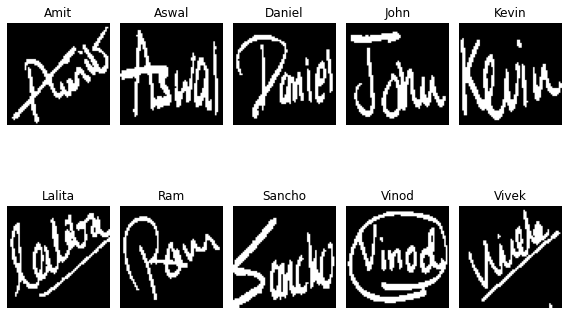

The Generated Signatures


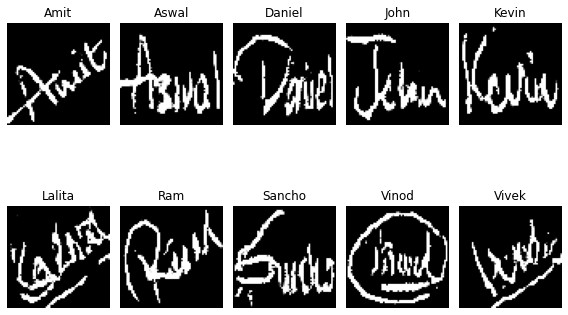

In [ ]:
print("The Original Signatures")
X1_train = np.squeeze(X1_train)
fig=plt.figure(figsize=(8, 6))
columns = 5
rows = 2
loc = [1,101,201,301,401,501,601,701,801,901]
for i in range(1, columns*rows +1):
  try:
      fig.add_subplot(rows, columns, i)
      plt.imshow(X1_train[loc[i-1]], cmap = 'gray')
      plt.axis("off")
      plt.title(Labels[int(Y1_train[loc[i-1]])])
  except:
      continue

plt.tight_layout()
plt.show()
X1_train = np.expand_dims(X1_train, 3)

print("The Generated Signatures")
X1_test = np.squeeze(X1_test)
fig=plt.figure(figsize=(8, 6))
columns = 5
rows = 2
loc = 729
for i in range(1, columns*rows +1):

# load the photo and extract the face
  try:
      fig.add_subplot(rows, columns, i)
      plt.imshow(X1_test[i+loc], cmap = 'gray')
      plt.axis("off")
      plt.title(Labels[int(Y1_test[i+loc])])
  except:
    continue

plt.tight_layout()
plt.show()
X1_test = np.expand_dims(X1_test, 3)

In [ ]:
#One hot encoding
from keras.utils import to_categorical

Y1_train = to_categorical(Y1_train)
Y1_test = to_categorical(Y1_test)

In [ ]:
#Shuffle
for i in range(20):
  from sklearn.utils import shuffle
  X1_train, Y1_train = shuffle(X1_train, Y1_train, random_state=0)
  from sklearn.utils import shuffle
  X1_test, Y1_test = shuffle(X1_test, Y1_test, random_state=0)

##**Convolutional Classifier Model**##

In [ ]:
model = Sequential()
model.add(Dense(32, input_shape=((64,64,1))))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.6))

model.add(Dense(64))
model.add(BatchNormalization(momentum=0.8))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.6))

model.add(Flatten())

model.add(Dense(512))
model.add(Dropout(0.6))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64, 64, 32)        64        
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
dense_13 (Dense)             (None, 64, 64, 64)        2112      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 64, 64)       

In [ ]:
optimizer = Adam(lr=0.00001)
model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(X1_test, Y1_test, epochs=10, validation_data = (X1_train, Y1_train), shuffle = True, verbose = 1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - 5s 2ms/step - loss: 1.9171 - accuracy: 0.6180 - val_loss: 16.0506 - val_accuracy: 0.9710
Epoch 2/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.8955 - accuracy: 0.8203 - val_loss: 13.8128 - val_accuracy: 0.9770
Epoch 3/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.7149 - accuracy: 0.8530 - val_loss: 12.1296 - val_accuracy: 0.9730
Epoch 4/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.6221 - accuracy: 0.8750 - val_loss: 12.2170 - val_accuracy: 0.9770
Epoch 5/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.5307 - accuracy: 0.8860 - val_loss: 13.6962 - val_accuracy: 0.9810
Epoch 6/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.4530 - accuracy: 0.9020 - val_loss: 12.8204 - val_accuracy: 0.9780
Epoch 7/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.4586

In [ ]:
#Plot the training history of the CNN
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
#Evalute the final accuracy of the CNN
results = model.evaluate(x=X1_train, y= Y1_train, batch_size=64, verbose=1)
print('Test Loss:', results[0],"Test Accuracy:", results[1]*100)

1000/1000 [==============================] - 0s 180us/step
Test Loss: 12.038420837402343 Test Accuracy: 98.00000190734863


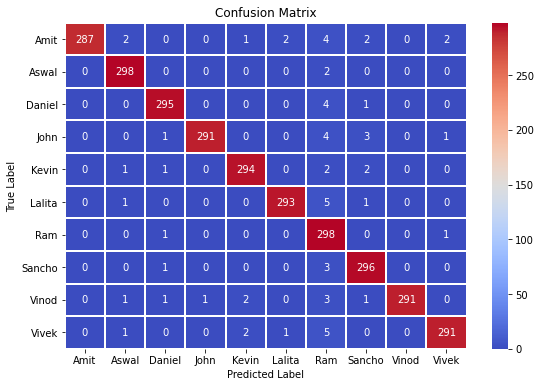

In [ ]:
#Display the confusion matrix
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(9, 6))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=Labels,
                yticklabels=Labels,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(X1_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(Y1_test, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)